<a href="https://colab.research.google.com/github/BBotond03/NASA_Space_Apps_Challenge_BHAF/blob/main/integral_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [64]:

# Read the data from a CSV file
df = pd.read_csv('data.csv')

# Display the DataFrame
print(df)


       time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)
0          1973-07-20T00:00:00.308000       0.000000  -1.692033e-15
1          1973-07-20T00:00:00.458943       0.150943  -2.127763e-15
2          1973-07-20T00:00:00.609887       0.301887  -2.329233e-15
3          1973-07-20T00:00:00.760830       0.452830  -2.247465e-15
4          1973-07-20T00:00:00.911774       0.603774  -1.961009e-15
...                               ...            ...            ...
572413     1973-07-21T00:00:02.270264   86401.962264  -1.844937e-17
572414     1973-07-21T00:00:02.421208   86402.113208  -3.699453e-16
572415     1973-07-21T00:00:02.572151   86402.264151  -4.981944e-16
572416     1973-07-21T00:00:02.723094   86402.415094  -5.963667e-16
572417     1973-07-21T00:00:02.874038   86402.566038  -8.385945e-16

[572418 rows x 3 columns]


In [65]:
import numpy as np
import matplotlib.pyplot as plt

class IntegralAnal:
    def __init__(self, df, batch_size=100, num_of_std=2):
        self.data = df
        self.time = df['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].to_numpy()
        self.time_rel = df['time_rel(sec)'].to_numpy()
        self.velocity = df['velocity(m/s)'].to_numpy()
        self.batch_size = batch_size
        self.integral = []  # Store the integral for each batch (integral value, time)
        self.num_of_std = num_of_std
        self.mean = 0
        self.std = 0
        self.event_times = []

    # Calculate numerical integral for each batch
    def num_integral(self):
        integral = 0  # Cumulative integral for each batch
        batch_start_time = self.time[0]  # Store the start time of the current batch

        for i in range(1, len(self.velocity)):
            dt = self.time_rel[i] - self.time_rel[i - 1]
            integral += self.velocity[i] * dt

            # Check if we've reached the batch size or the end of data
            if (i % self.batch_size == 0) or (i == len(self.velocity) - 1):
                # Append the batch's integral and the start time of that batch
                self.integral.append([integral, batch_start_time])

                # Reset integral and set the new batch start time
                integral = 0
                batch_start_time = self.time[i]

        return self.integral

    # Calculate the average of batch integrals
    def calculate_average_integral(self):
        if not self.integral:
            self.num_integral()  # Ensure integral is calculated

        integrals_only = [i[0] for i in self.integral]  # Extract just the integral values
        self.mean = np.mean(integrals_only)  # Calculate mean
        return self.mean

    # Calculate the standard deviation of batch integrals
    def calculate_std_integral(self):
        if not self.integral:
            self.num_integral()  # Ensure integral is calculated

        integrals_only = [i[0] for i in self.integral]  # Extract just the integral values
        self.std = np.std(integrals_only)  # Calculate standard deviation
        return self.std

    # Identify event times based on deviation from the mean
    def find_event_times(self):
        if not self.integral:
            self.num_integral()  # Ensure integral is calculated

        self.calculate_average_integral()  # Ensure mean is calculated
        self.calculate_std_integral()  # Ensure std is calculated

        for integral_value, time in self.integral:
            if abs(integral_value - self.mean) > self.num_of_std * self.std:
                self.event_times.append((integral_value, time))
                print(f"Event time: {time} | Integral: {integral_value}")

        return self.event_times

    # Plot the integral for each batch
    def plot_integral(self):
        if not self.integral:
            self.num_integral()  # Ensure integral is calculated

        integrals_only = [i[0] for i in self.integral]  # Extract just the integral values
        batch_indices = range(len(integrals_only))
        plt.plot(batch_indices, integrals_only, label='Batch Integrals')
        plt.xlabel('Batch Index')
        plt.ylabel('Integral')
        plt.title('Numerical Integral of Velocity for Each Batch')
        plt.legend()
        plt.show()


Event time: 1973-07-20T03:21:15.779698 | Integral: -9.243054507950663e-09
Event time: 1973-07-20T14:15:21.062717 | Integral: -1.122961982207081e-08


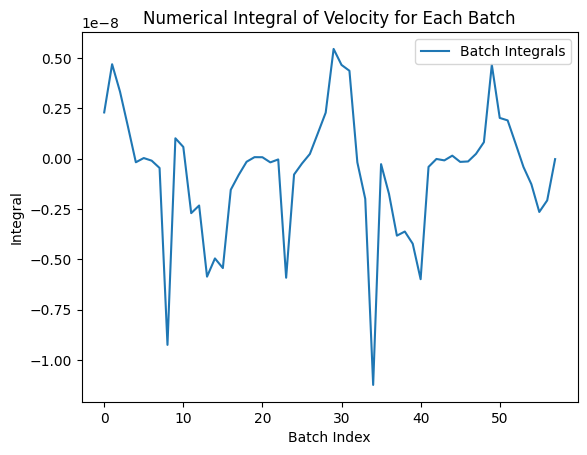

Mean integral per batch: -6.709503607939513e-10
Standard deviation of integrals: 3.1545261613704027e-09


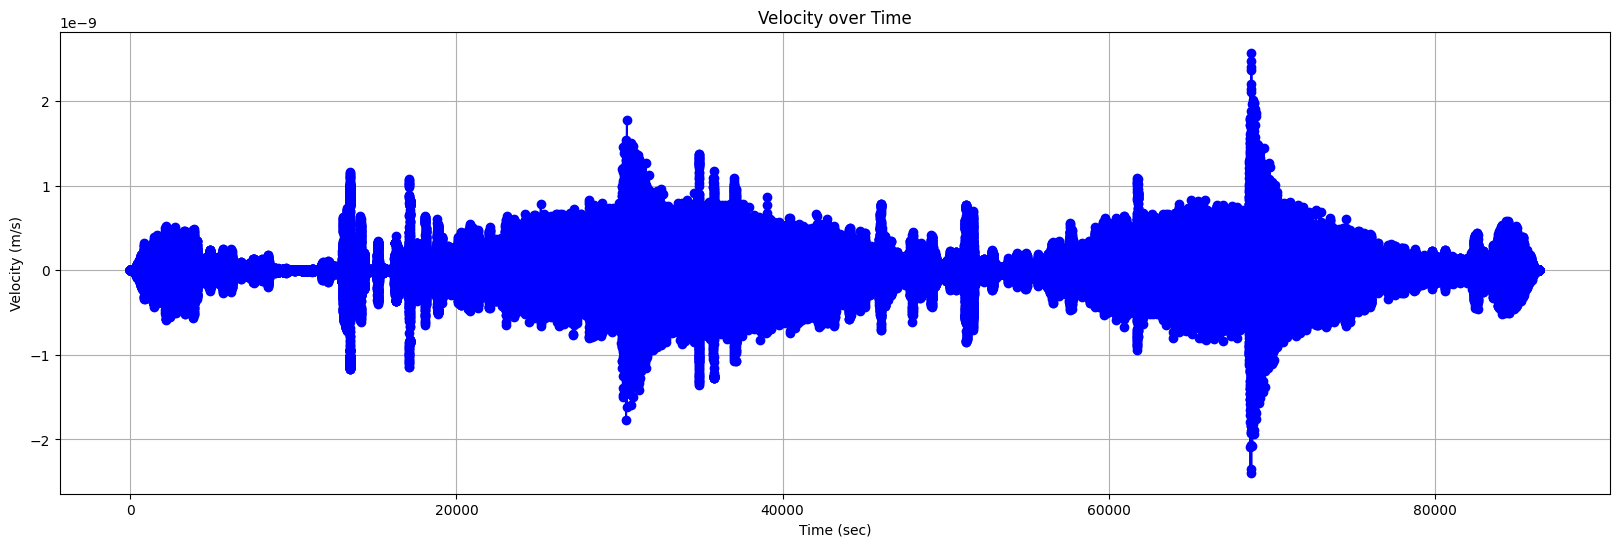

In [73]:
# Assuming df is a DataFrame with the required columns
analysis = IntegralAnal(df, batch_size=10000, num_of_std=2.5)
analysis.num_integral()
mean = analysis.calculate_average_integral()
std = analysis.calculate_std_integral()
event_times = analysis.find_event_times()
analysis.plot_integral()

print("Mean integral per batch:", mean)
print("Standard deviation of integrals:", std)
plt.figure(figsize=(20, 6))
plt.plot(df['time_rel(sec)'], df['velocity(m/s)'], marker='o', linestyle='-', color='b')
plt.title('Velocity over Time')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()
